## Contents
**regions2**
1. 1D Histograms of polarization fraction, column density and gamma
2. 2D Histograms of polarization fraction wrt column density
3. Change in polarization fraction with change in column density plotted on 2D histogram

## Imports

In [11]:
import matplotlib
import aplpy
from astropy.visualization import astropy_mpl_style
import math as m
import scipy.optimize as opt
import statistics as st

from regions import Regions
from regions.core import PixCoord
from regions.shapes import RectangleSkyRegion, RectanglePixelRegion

import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import Angle, SkyCoord
from astropy.utils.data import get_pkg_data_filename
from astropy import units as u
import numpy as np
import matplotlib.ticker as tick

matplotlib.rcParams.update({'font.size': 18})
#matplotlib.rcParams['figure.figsize'] = (15, 7)

## Opening files

In [12]:
regions_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/regions3.reg'
orion_A_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10.fits'
orion_A_cov_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10_cov.fits'
col_dens_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm6_dust.fits'

orion_A_data = get_pkg_data_filename(orion_A_file)
orion_A = fits.open(orion_A_file)
orion_A_cov = fits.open(orion_A_cov_file)
col_dens = fits.open(col_dens_file)
orion_A_cov_data = orion_A_cov[0].data

wcs = WCS(orion_A[4].header)

#orion_A.info()
#orion_A_cov.info()
#col_dens.info()

In [13]:
with fits.open(orion_A_file) as orion_A:
    i_stokes = orion_A[0].data
    q_stokes = orion_A[1].data
    u_stokes = orion_A[2].data
    polint = orion_A[3].data
    pol_frac = orion_A[4].data
    bpos_ang = orion_A[5].data
    pol_disp = orion_A[6].data
    
with fits.open(orion_A_cov_file) as orion_A_cov:
    ii_stokes_cov = orion_A_cov[0].data
    iq_stokes_cov = orion_A_cov[1].data
    iu_stokes_cov = orion_A_cov[2].data
    qq_stokes_cov = orion_A_cov[3].data
    qu_stokes_cov = orion_A_cov[4].data
    uu_stokes_cov = orion_A_cov[5].data
    pi_var_cov = orion_A_cov[6].data
    pf_var_cov = orion_A_cov[7].data  ##<--- pol frac cov
    bang_var_cov = orion_A_cov[8].data
    s_var_cov = orion_A_cov[9].data

with fits.open(col_dens_file) as col_dens:
    tau353 = col_dens[0].data
    
#tau353 = (tau353_0*8.3333*10**25).astype('>f8') #hydrogen col density
regions = Regions.read(regions_file, format = 'ds9') ##same as parsing?


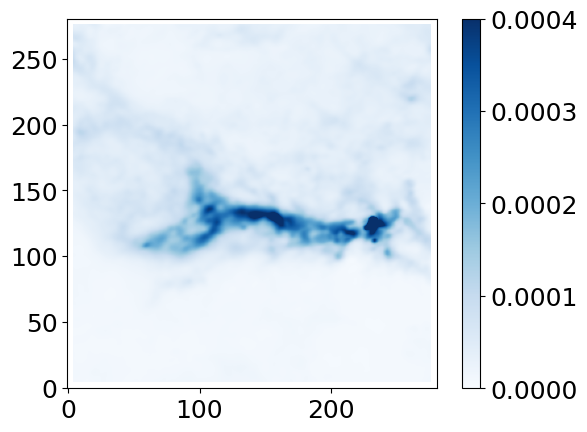

In [14]:
wcs = WCS(col_dens[0].header)
#plt.title('column density plot')
plt.imshow(tau353, vmin = 0.0 , vmax = 0.0004, cmap = 'Blues')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
#plt.savefig('image_col_density')


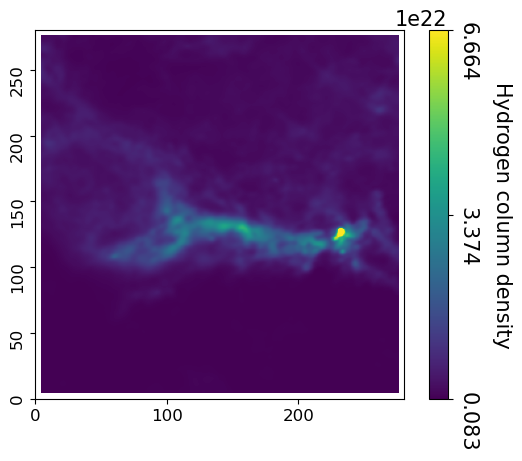

In [15]:
plt.rcParams.update({'font.size': 15})

wcs = WCS(col_dens[0].header)
#plt.title('column density plot')
vmin = 0.00001*(8.33*10**25)
vmax = 0.0008*(8.33*10**25)
plt.imshow(tau353*(8.33*10**25), vmin = 0.00001*(8.33*10**25) , vmax = 0.0008*(8.33*10**25), cmap = 'viridis')
plt.gca().invert_yaxis()
cbar = plt.colorbar(ticks = np.linspace(vmin, vmax, 3))
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.tick_params(rotation=270)


plt.yticks(fontsize = 12, rotation = 90)
plt.xticks(fontsize = 12)
cbar.set_label('Hydrogen column density', rotation=270, fontsize = 15, labelpad=25)
plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/orion/plots/image_col_density')
#help(plt.colorbar())

#### making and plotting mask

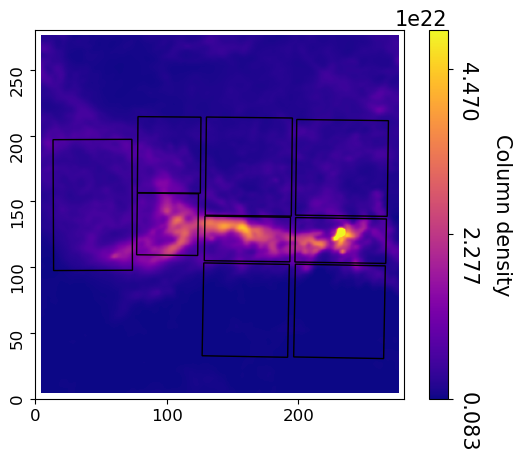

In [16]:
plt.imshow(tau353*(8.33*10**25), vmin = 0.00001*(8.33*10**25) , vmax = 0.0006*(8.33*10**25), cmap = 'plasma')
vmin = 0.00001*(8.33*10**25)
vmax = 0.0008*(8.33*10**25)
cbar = plt.colorbar(ticks = np.linspace(vmin, vmax, 4))
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.tick_params(rotation=270)
plt.yticks(fontsize = 12, rotation = 90)
plt.xticks(fontsize = 12)
cbar.set_label('Column density', rotation=270, fontsize = 15, labelpad=25)

#plt.title('Column density')
plt.gca().invert_yaxis()

regions_pix = []
for x in range(len(regions)):
    region0 = (RectangleSkyRegion(regions[x].center, regions[x].width, regions[x].height, regions[x].angle))
    regions_pix.append(region0.to_pixel(wcs))
    regions_pix[x].plot()
plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/orion/plots/image_col_density')

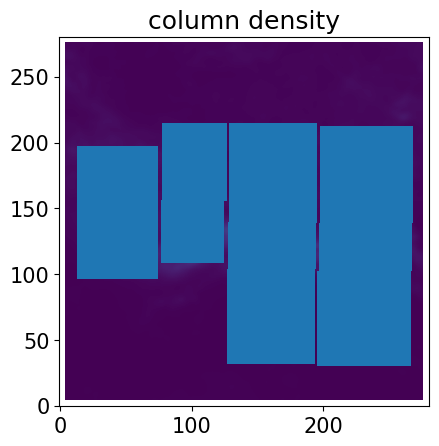

In [21]:
plt.imshow(tau353)
plt.title('column density')

ax = plt.subplot(1, 1, 1)
plt.gca().invert_yaxis()

mask_list = []

for x in range(len(regions_pix)):
    mask = regions_pix[x].to_mask()
    mask_list.append(mask)
    ax.add_artist(mask.bbox.as_artist())

In [22]:
#ax = plt.subplot(1, 1, 1)
tau353_list = []

for x in range(len(mask_list)):
    #plt.gca().invert_yaxis()

    mask0 = mask_list[x].to_image(tau353.shape)
    
    mask_trial = np.logical_and(tau353, mask0 == 1)
    mask_coord = mask_trial.nonzero() 
    tau353_list.append(tau353[mask_coord]*(8.33*10**25)) ## converting to column density
    #tau353_list[x] = tau353_list[x][~np.isnan(tau353[x])] ##removing all nan values (i.e. from list [3])
    #plt.imshow(mask_trial)
    #plt.title('mask #' + str(x))
    #plt.show()

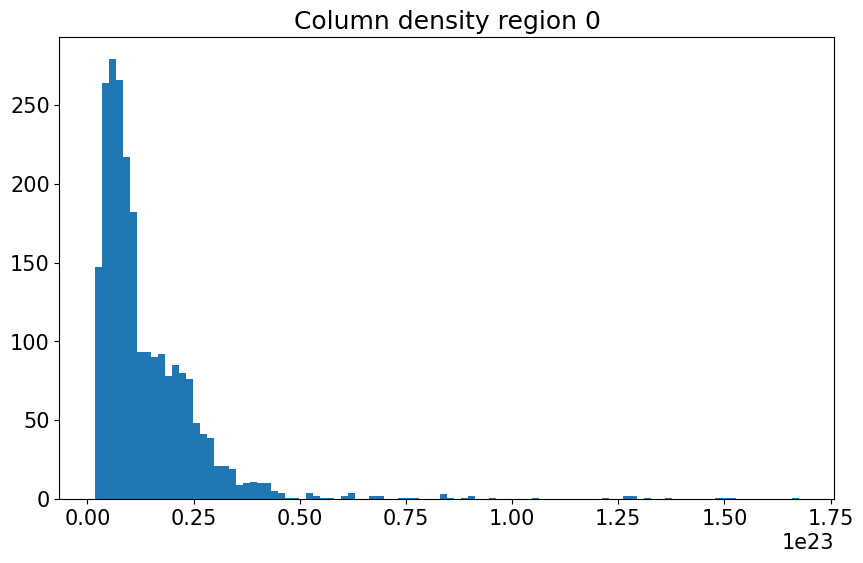

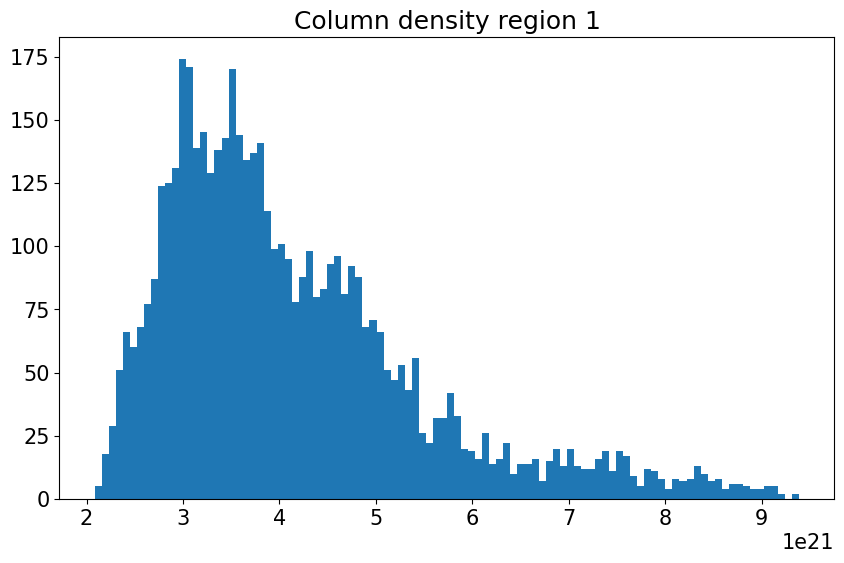

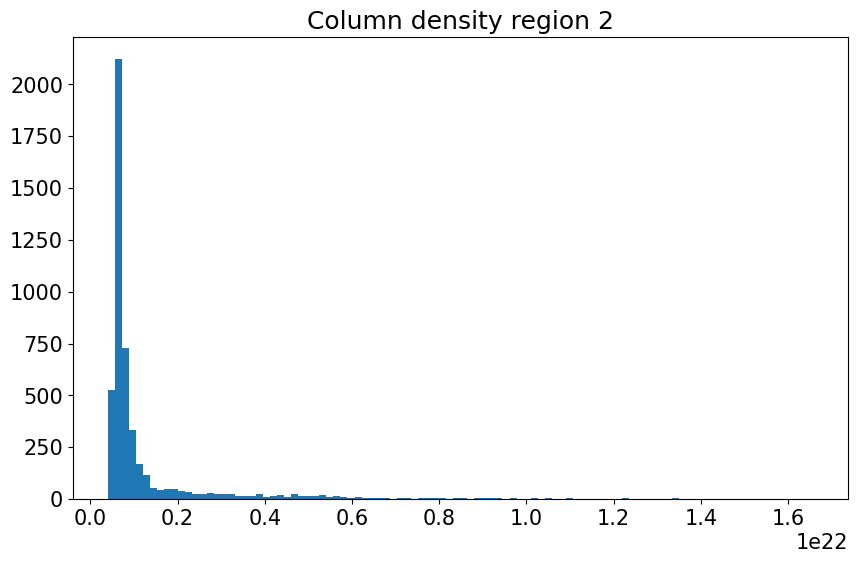

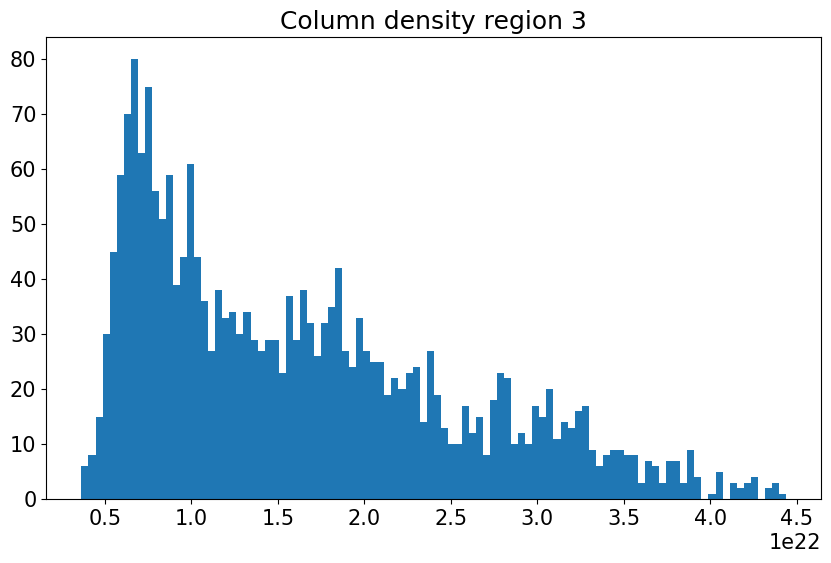

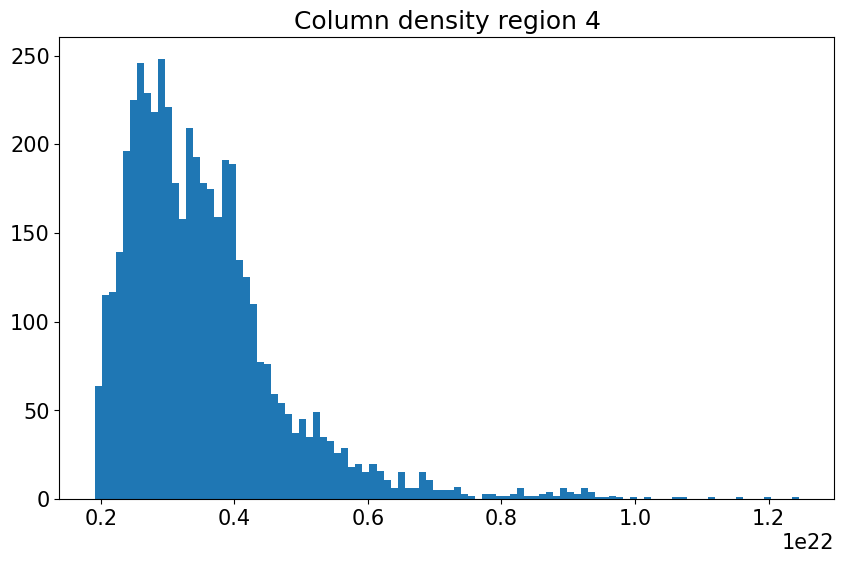

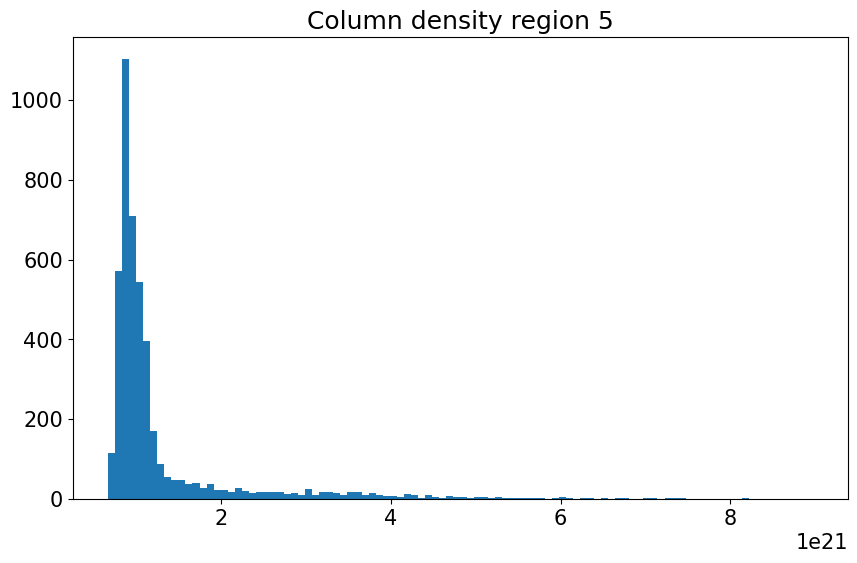

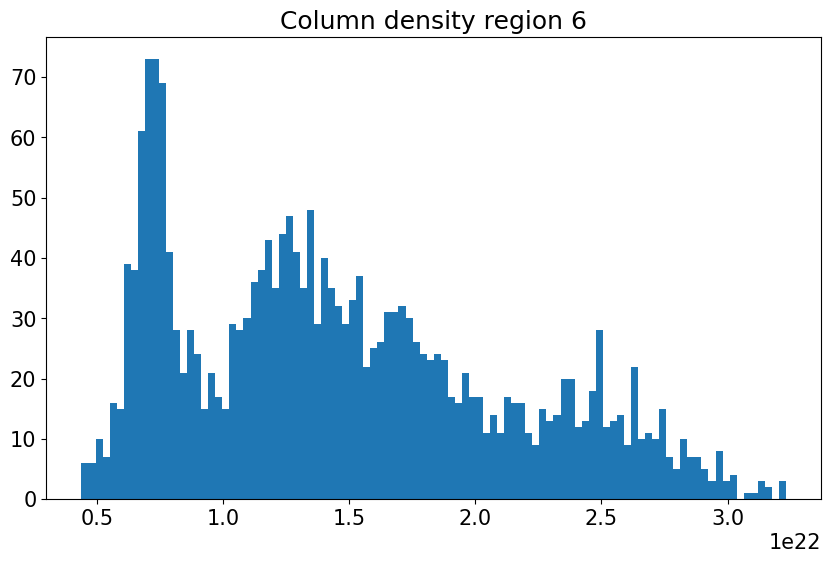

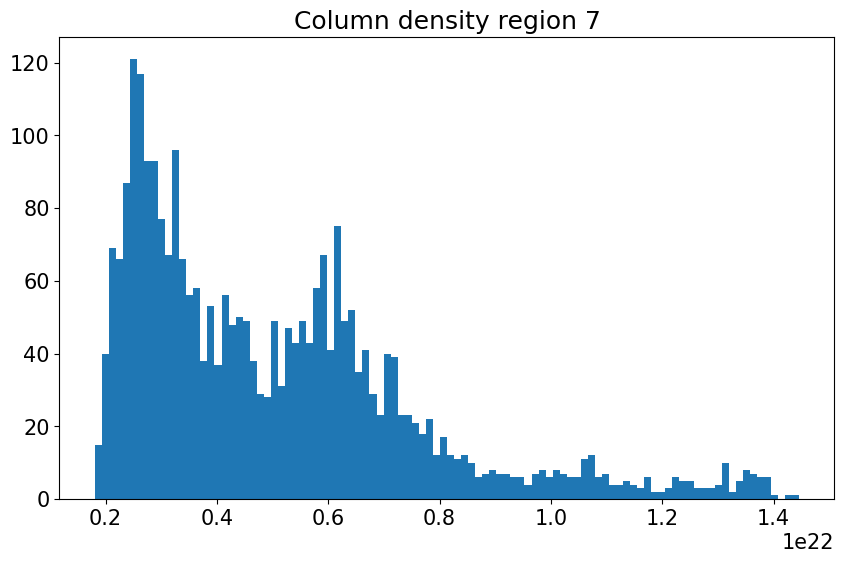

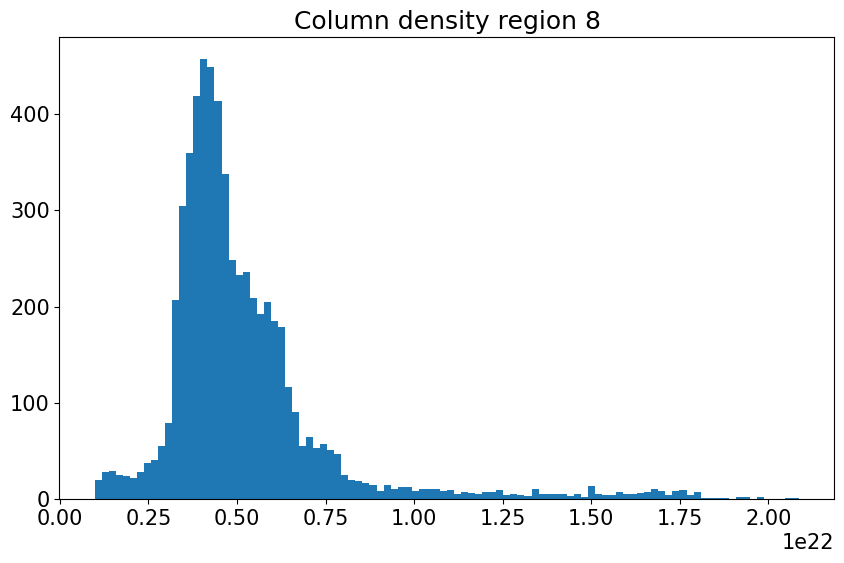

In [23]:
#hist, bins, patches = plt.hist(tau353_list[3], 100)

for x in range(len(tau353_list)):
    plt.figure(figsize = (10, 6))
    hist, bins, patches = plt.hist(tau353_list[x], 100)
    plt.title('Column density region ' + str(x))
    
#   plt.savefig('col_dens2_'+str(x))
    plt.show()


#plt.figure(figsize = (10, 6))
#hist, bins, patches = plt.hist(tau353_list[7], 100)
#plt.title('Column density region ' + str(7))
#plt.show()

#plt.savefig('col_dens_'+str(7))


In [24]:
pol_frac_list = []

for x in range(len(mask_list)):
    mask0 = mask_list[x].to_image(pol_frac.shape)
    
    mask_trial = np.logical_and(pol_frac, mask0 == 1)
    mask_coord = mask_trial.nonzero() 
    pol_frac_list.append(pol_frac[mask_coord])
    #pol_frac_list[x] = pol_frac_list[x][~np.isnan(pol_frac_list[x])] ##removing all nan values (i.e. from list [3])

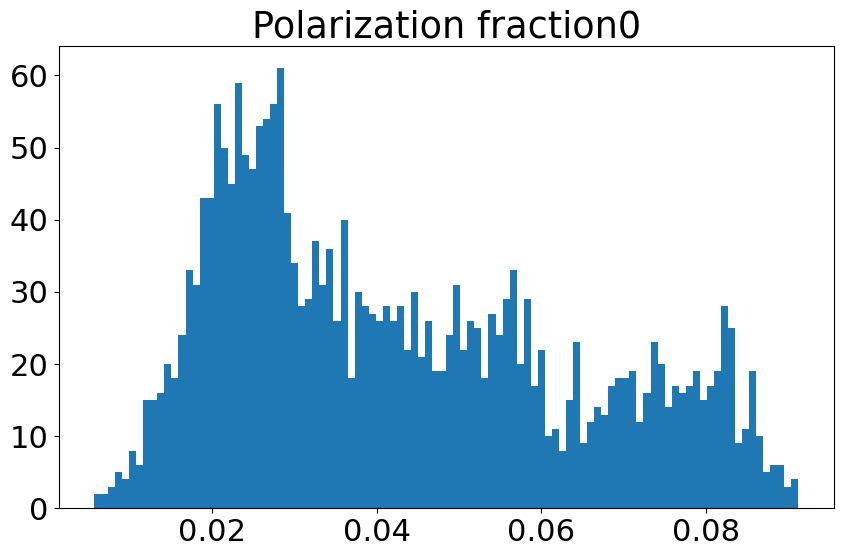

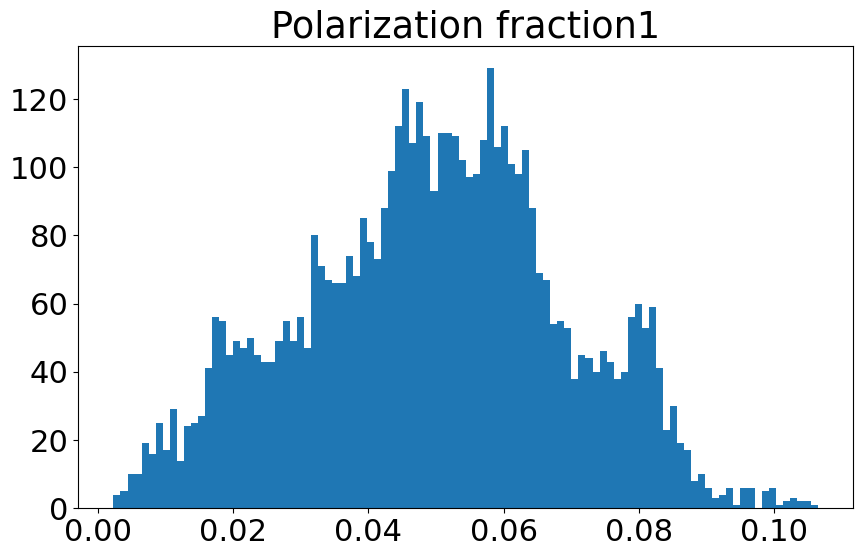

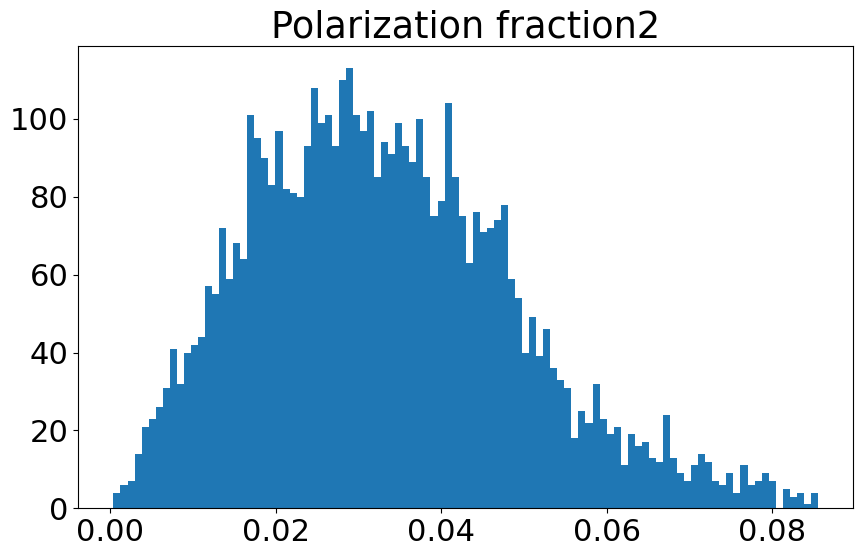

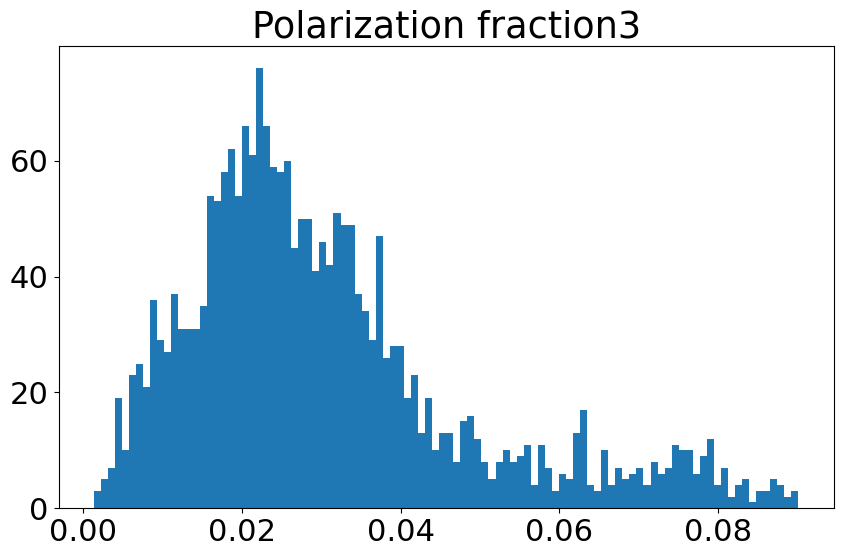

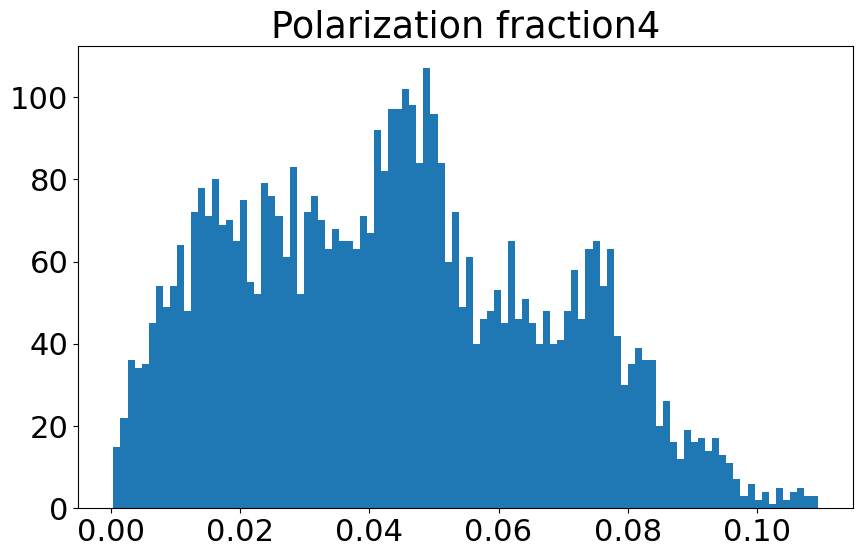

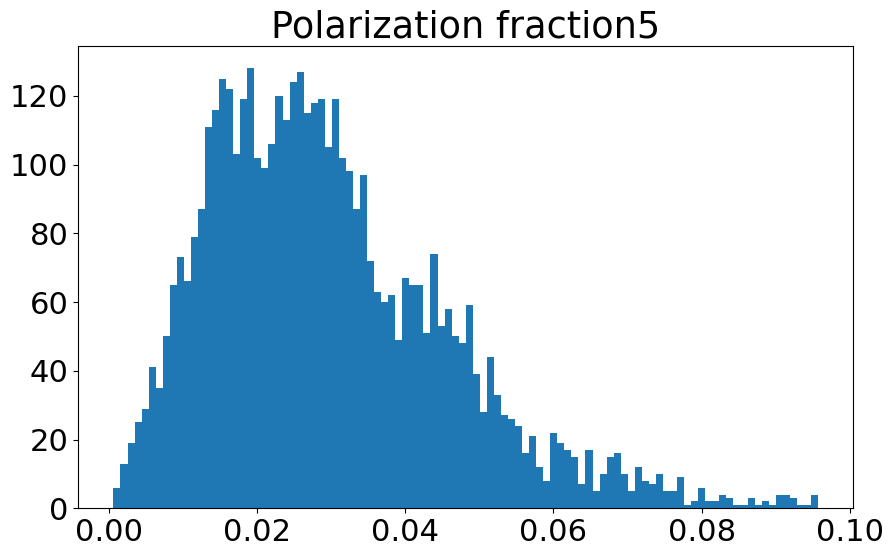

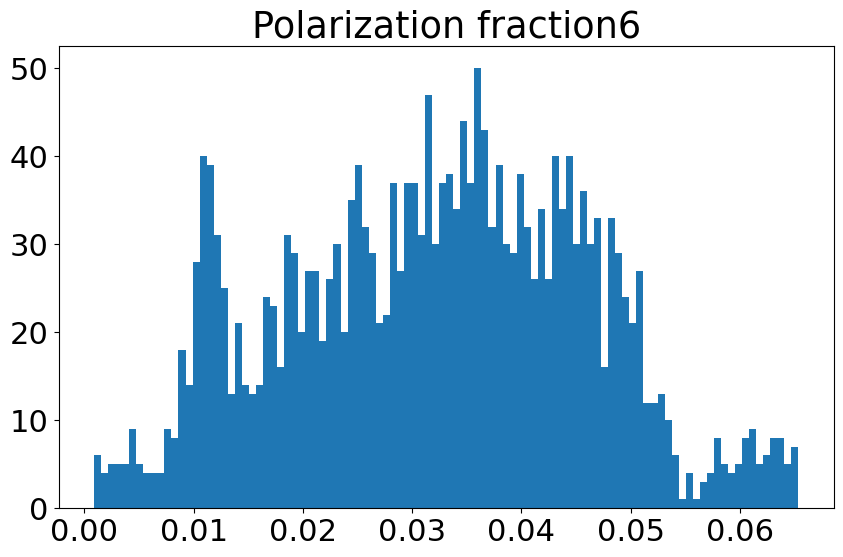

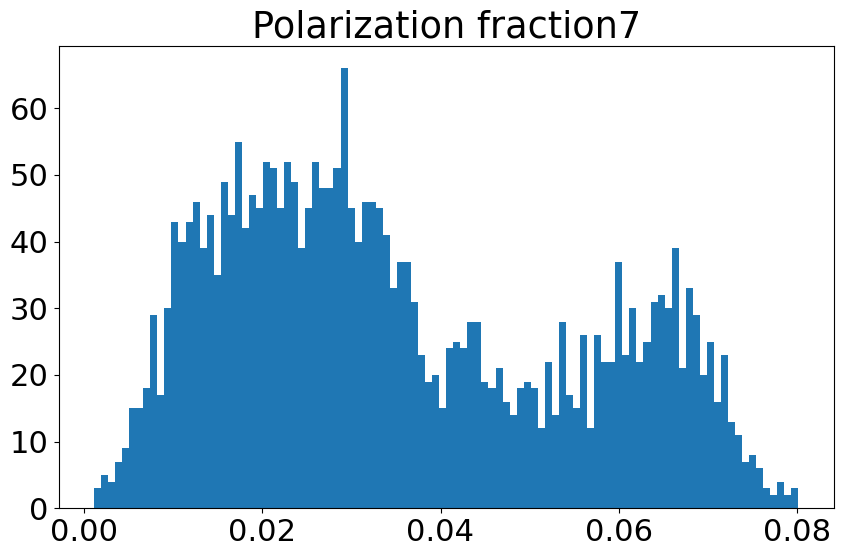

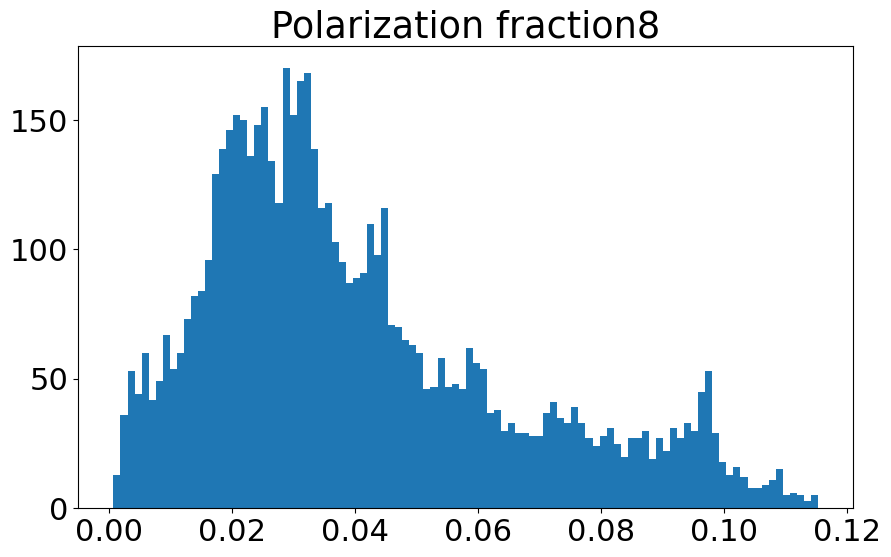

In [29]:
for x in range(len(pol_frac_list)):
    plt.figure(figsize = (10, 6))
    hist, bins, patches = plt.hist(pol_frac_list[x], 100)
    plt.title('Polarization fraction' + str(x))
#   plt.savefig('pol_frac2_'+str(x))
    plt.show()

63.00106867103535


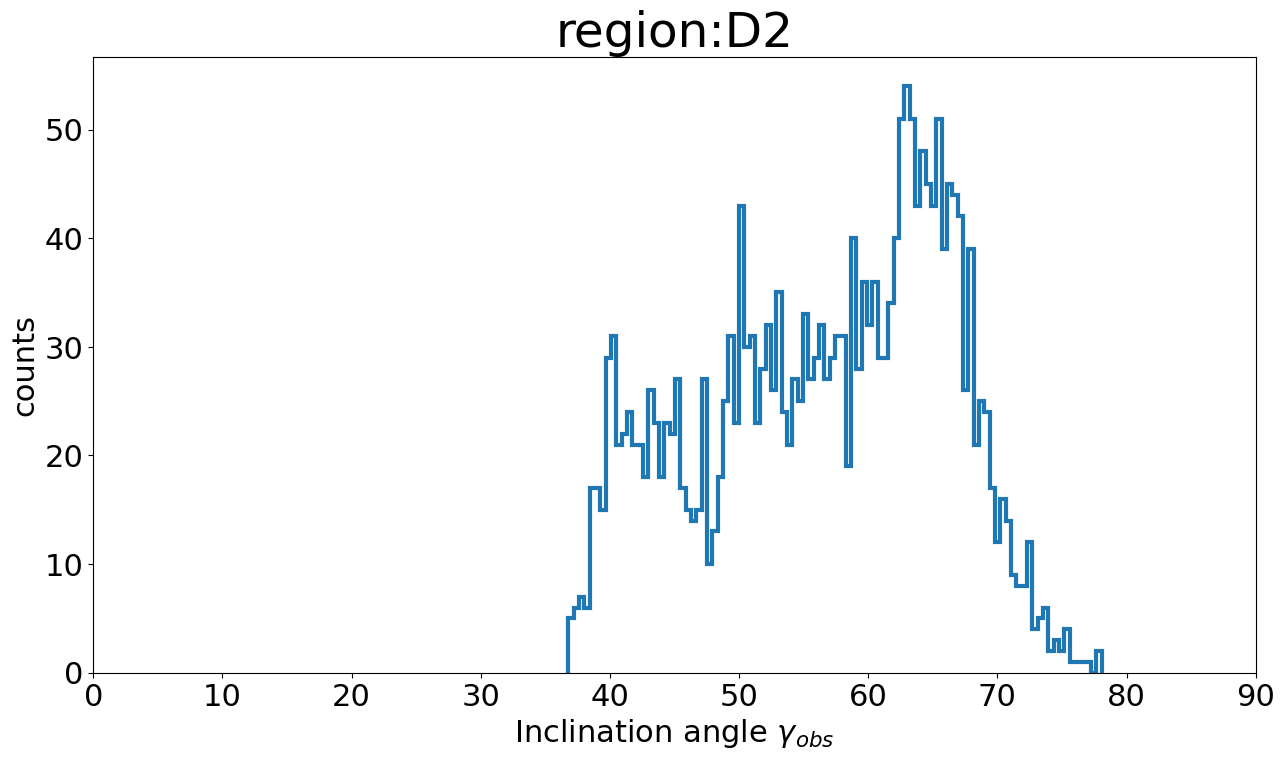

49.642413803551285


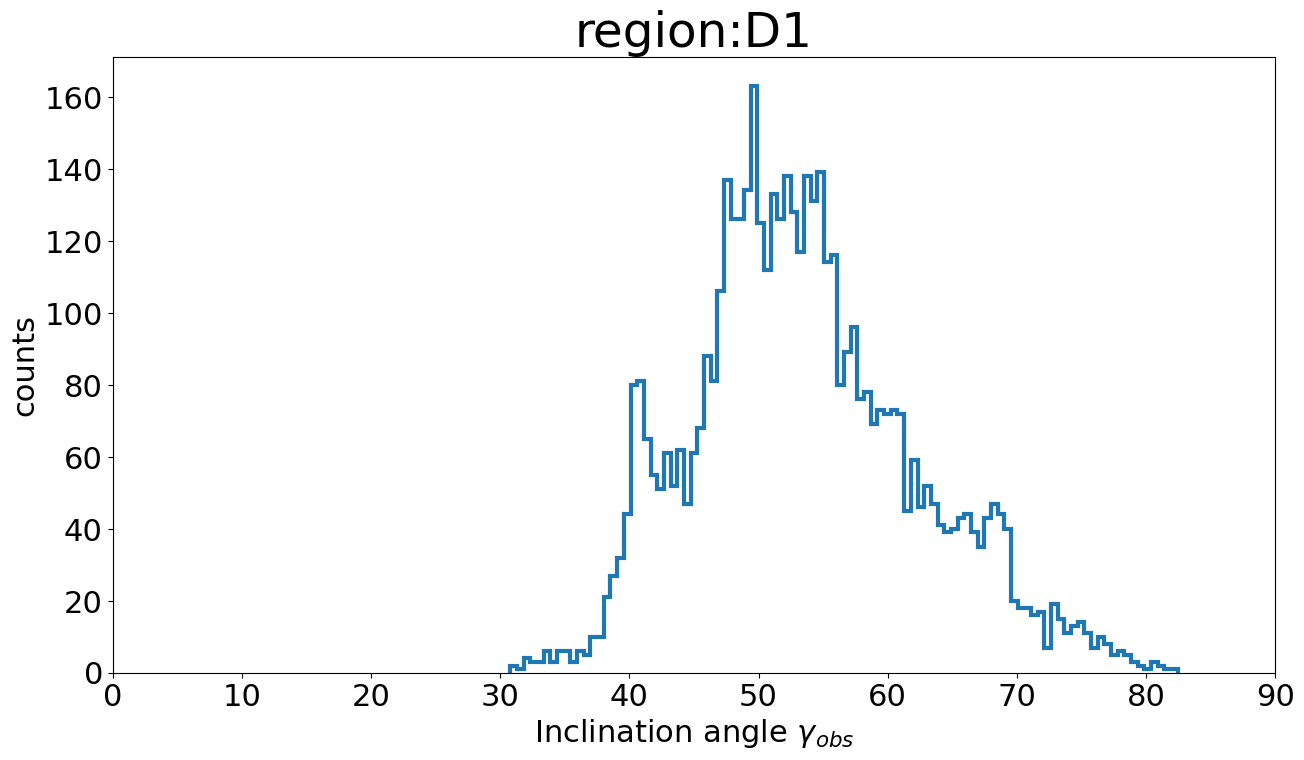

62.18762907013259


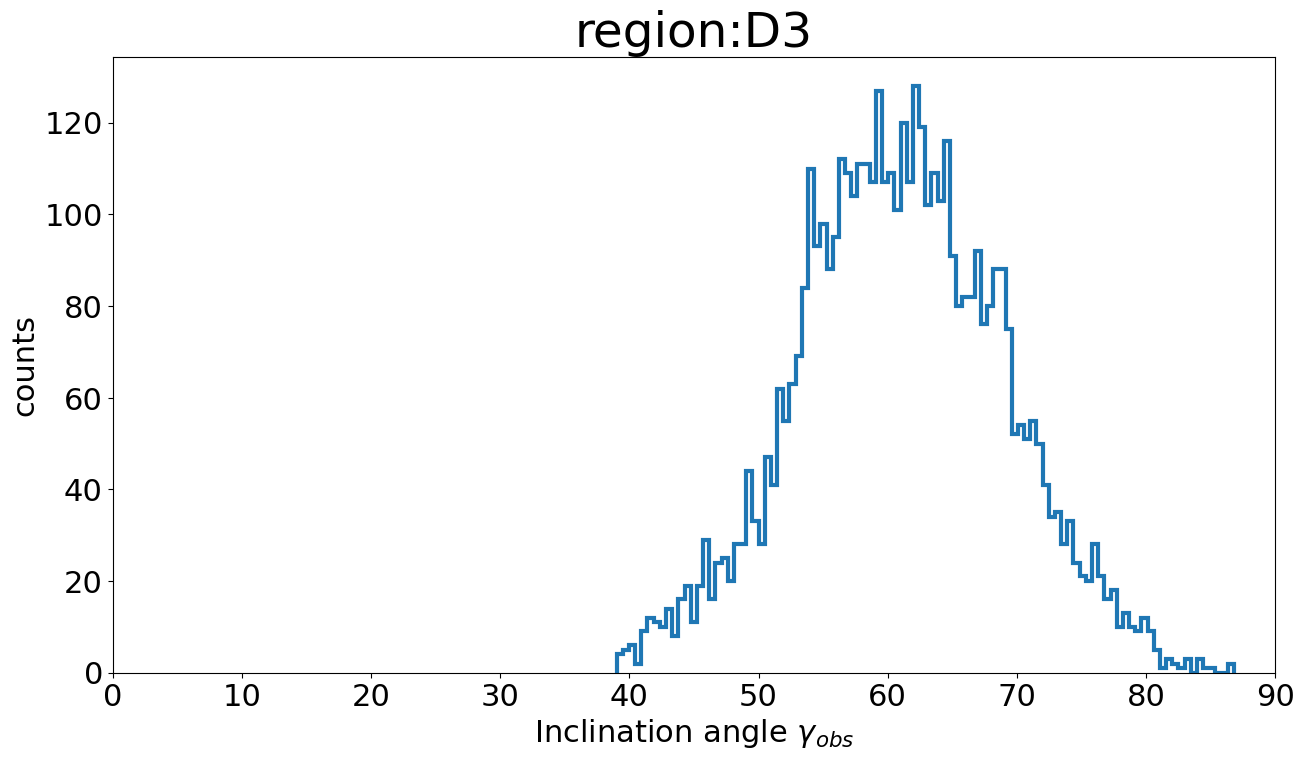

65.65701544292897


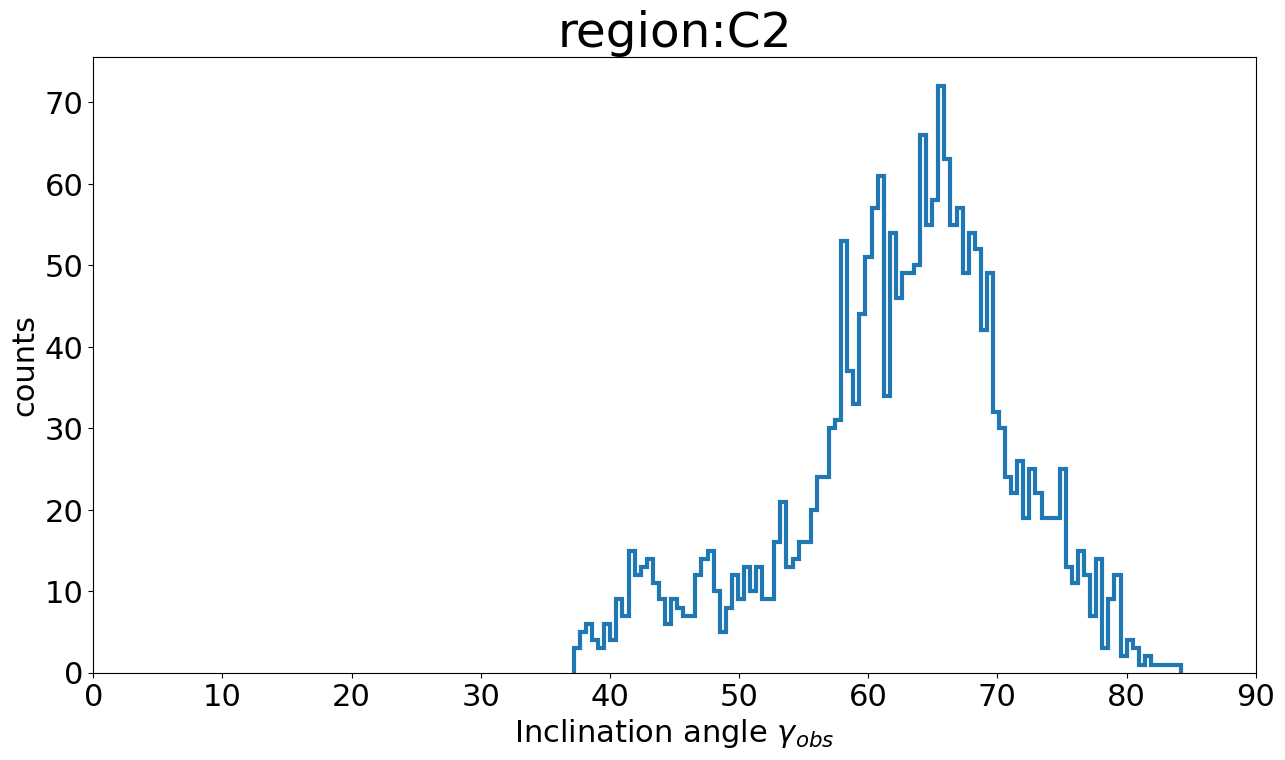

53.37086588787889


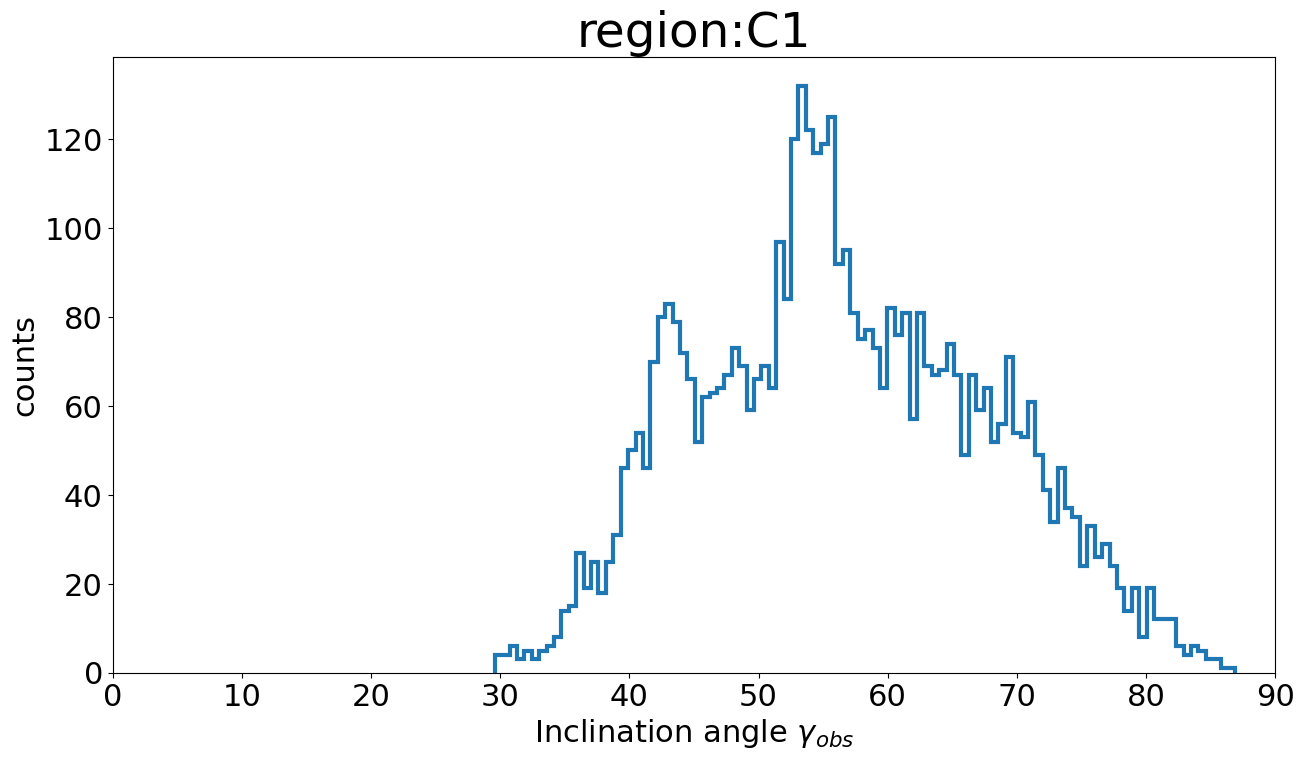

63.95713525679942


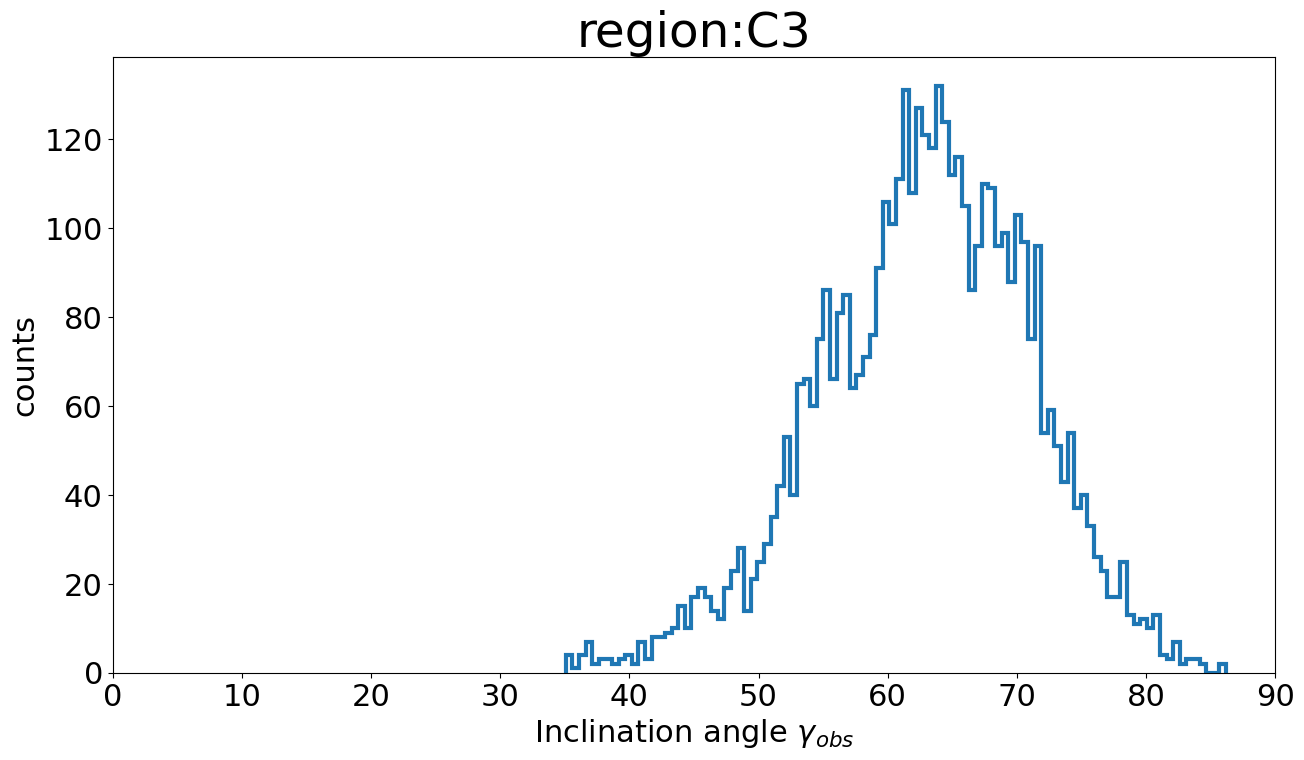

58.86488023759961


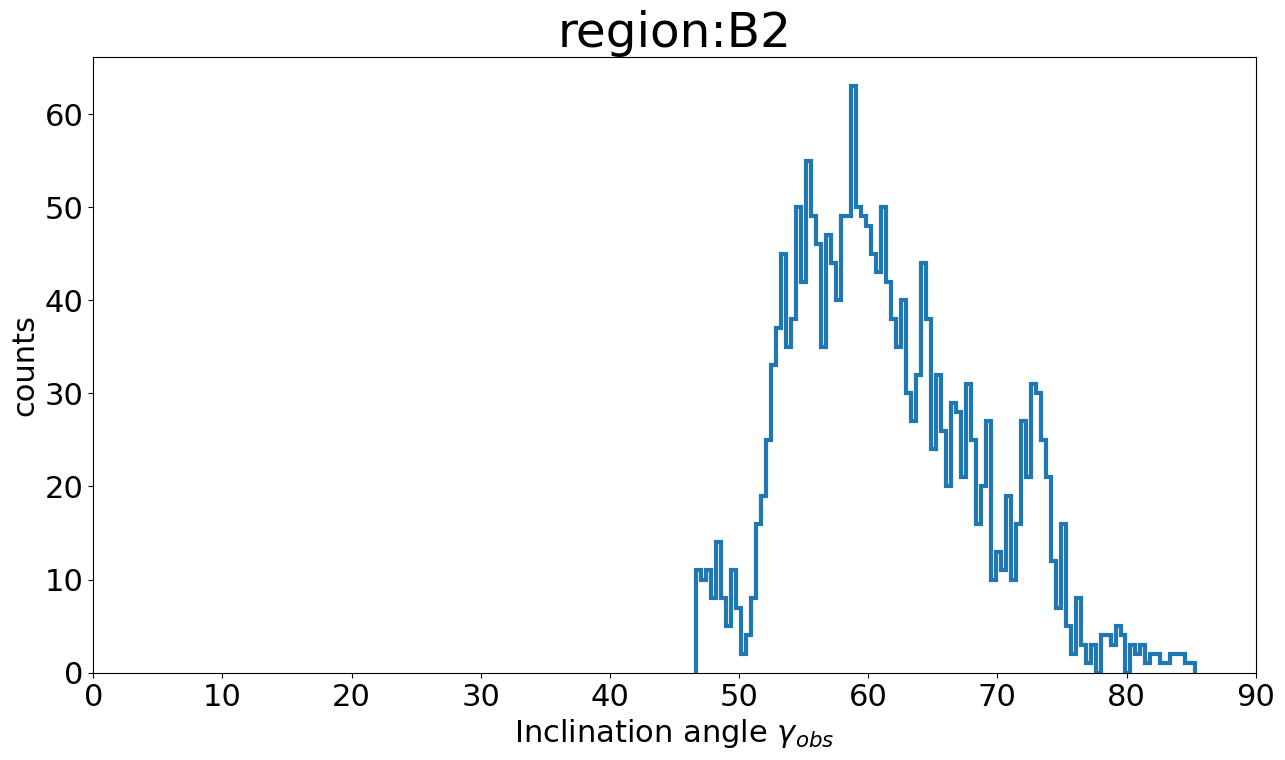

62.17779678403565


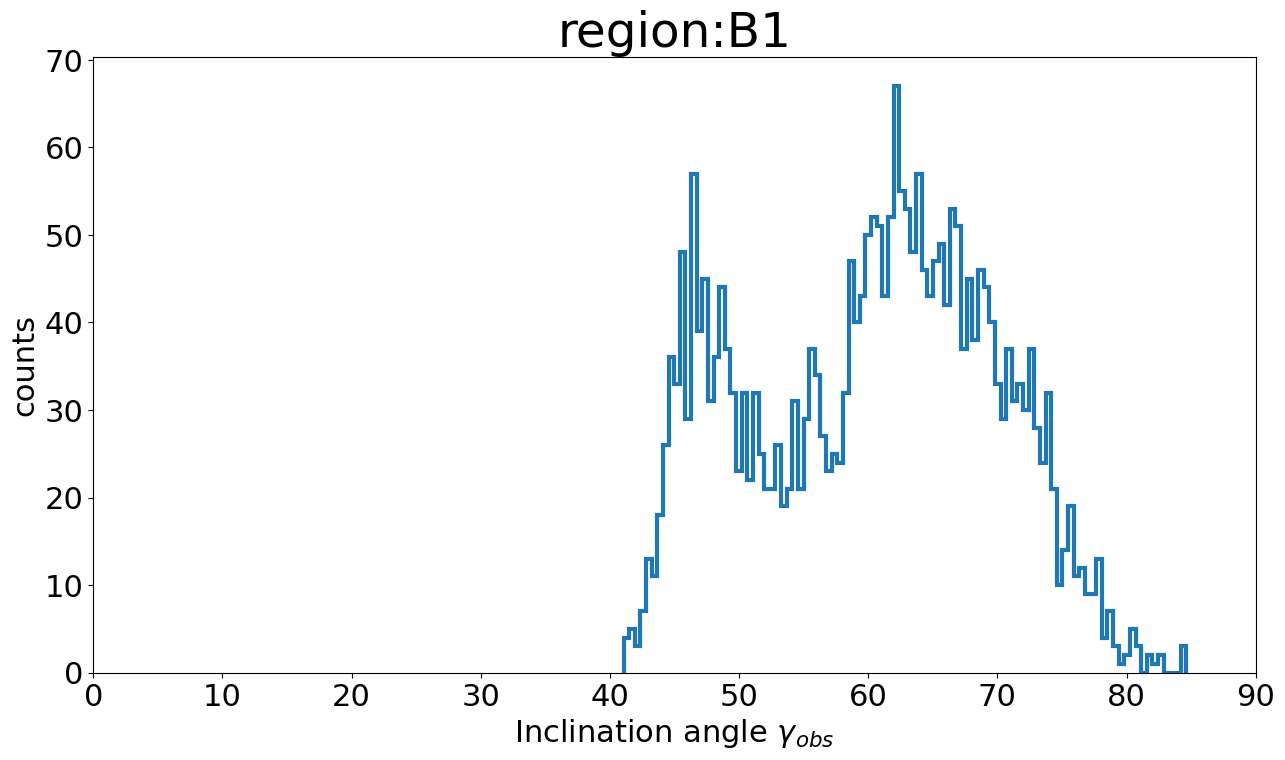

60.8720421136977


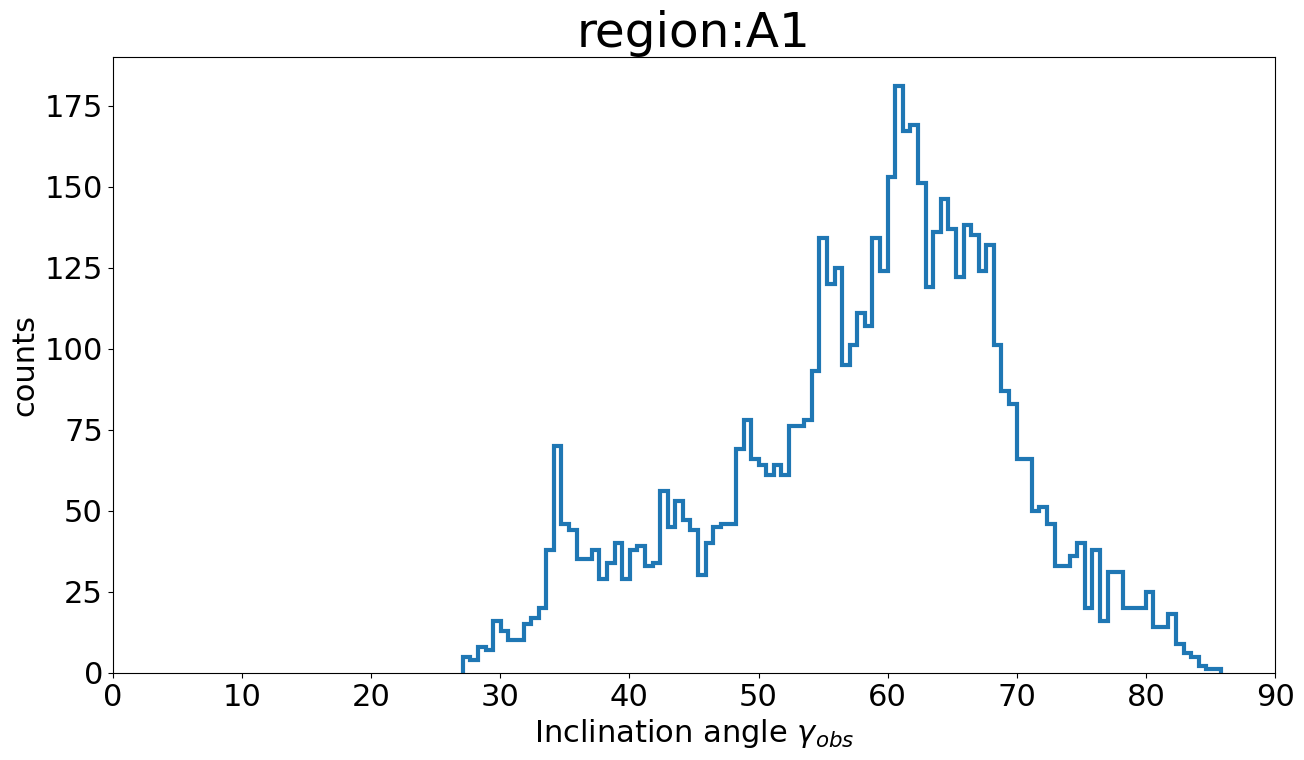

[63.00106867103535, 49.642413803551285, 62.18762907013259, 65.65701544292897, 53.37086588787889, 63.95713525679942, 58.86488023759961, 62.17779678403565, 60.8720421136977]
['D2', 'D1', 'D3', 'C2', 'C1', 'C3', 'B2', 'B1', 'A1']


In [35]:
p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma_list = []
label = ['D2', 'D1', 'D3', 'C2', 'C1', 'C3', 'B2', 'B1', 'A1']
mode = []

for x in range(len(pol_frac_list)):
    plt.figure(figsize = (15,8))
    plt.rcParams.update({'font.size': 22})


    gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in pol_frac_list[x]]
    #gamma = gamma[~np.isnan(gamma)]
    gamma_list.append(gamma)
    hist, bins, patches = plt.hist(gamma, 100, histtype = 'step', lw = 3)
    max_bin = hist.argmax()
    print((bins[max_bin] + bins[max_bin + 1]) / 2)
    mode.append((bins[max_bin] + bins[max_bin + 1]) / 2)

    plt.title('region:' + label[x], fontsize = 35)
    plt.xlim(0, 90)
    plt.xlabel('Inclination angle $\gamma_{obs}$')
    plt.ylabel('counts')
    #plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/orion/plots/image_gamma_reg3_'+ str(x)+ '_' + label[x], dpi=300, bbox_inches = "tight")
    
    plt.show()

print(mode)
print(label)
#plt.figure(figsize = (0.1, 0.1))

#hist, bins, patches = plt.hist(gamma_list[7], 100)
#plt.title('gamma_'+ str(7))
#plt.savefig('gamma_'+str(7))
#plt.show()

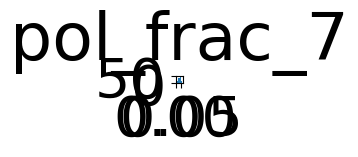

In [101]:
#for x in range(len(pol_frac_list)):
    #hist, bins, patches = plt.hist(pol_frac_list[x], 100)
    #plt.title('pol frac reg wo/cov '+ str(x))
    #plt.show()

plt.figure(figsize = (0.1, 0.1))

hist, bins, patches = plt.hist(pol_frac_list[6], 100)
plt.title('pol_frac_'+ str(7))
#plt.savefig('pol_frac_'+str(7))
plt.show()

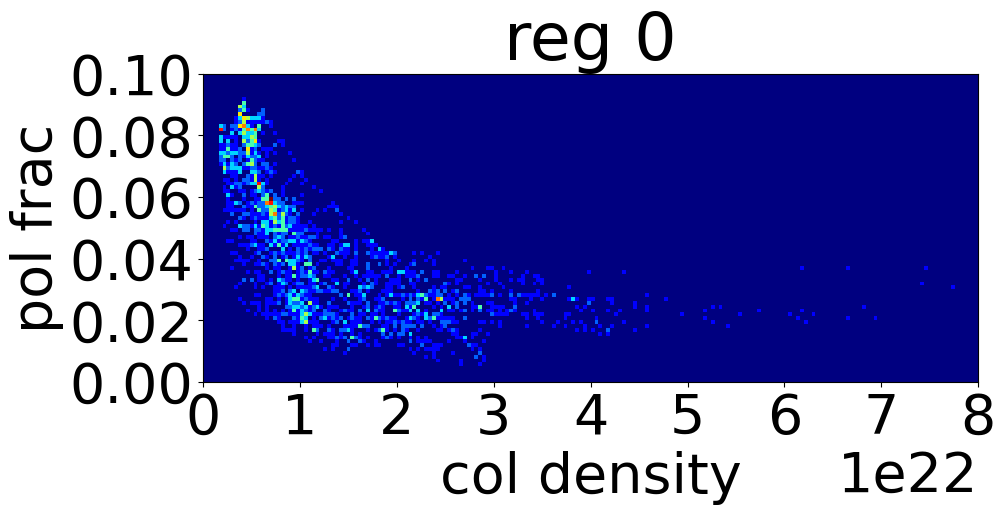

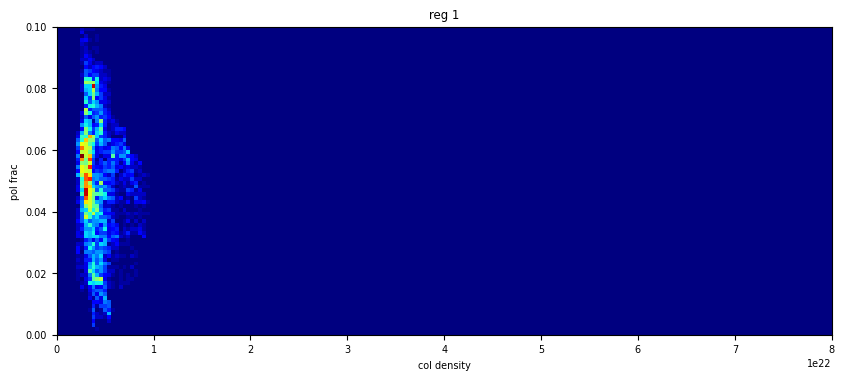

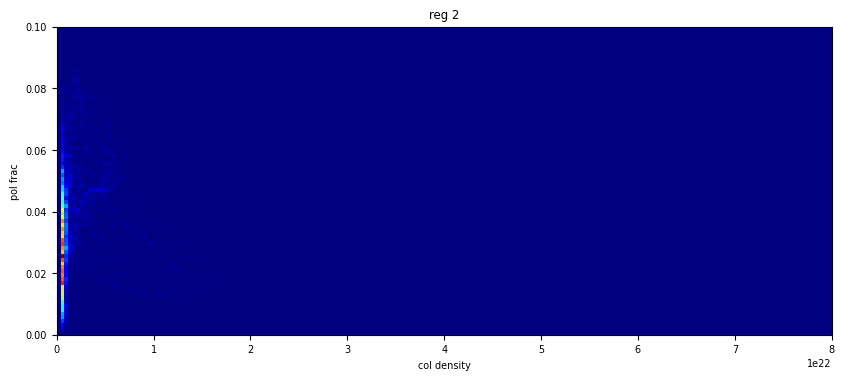

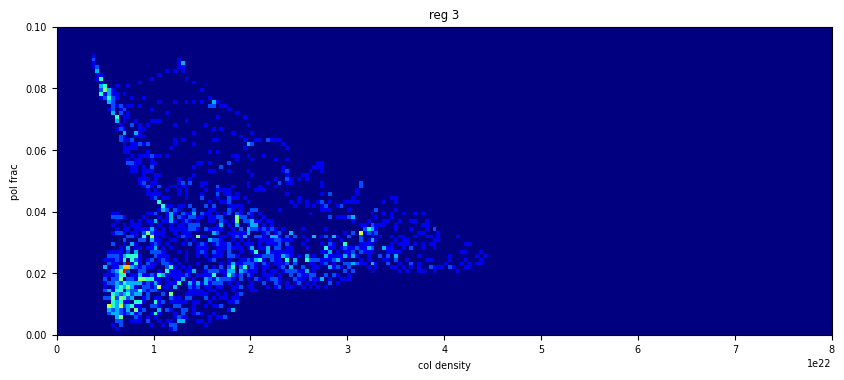

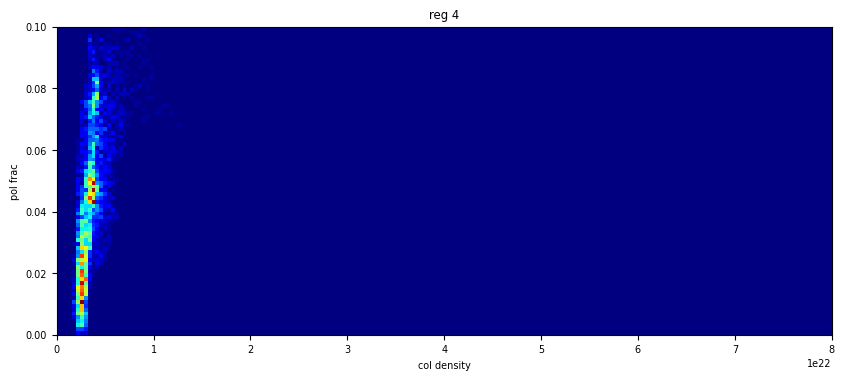

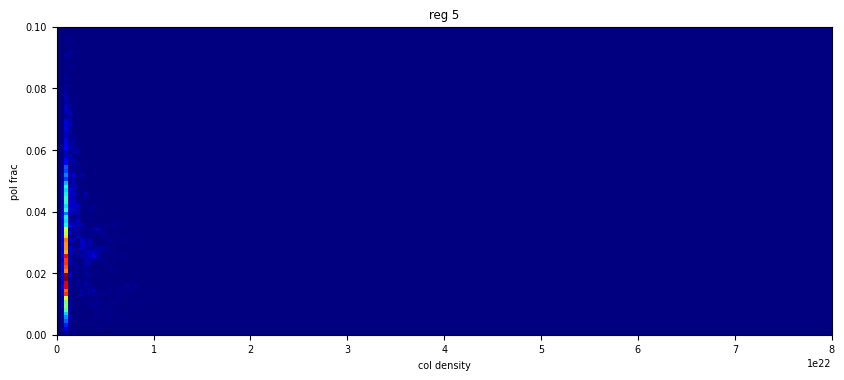

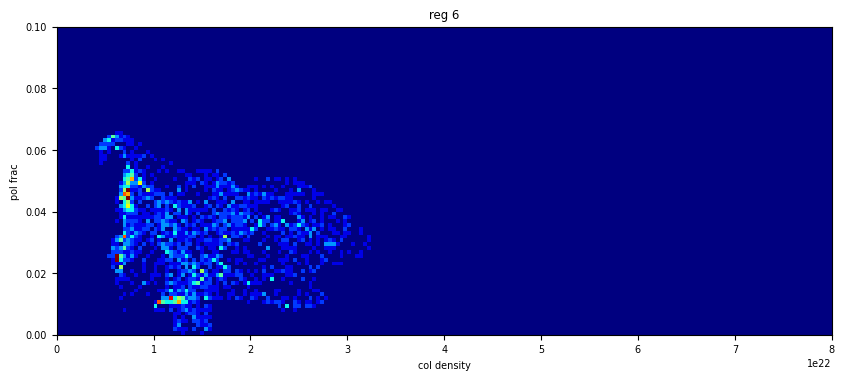

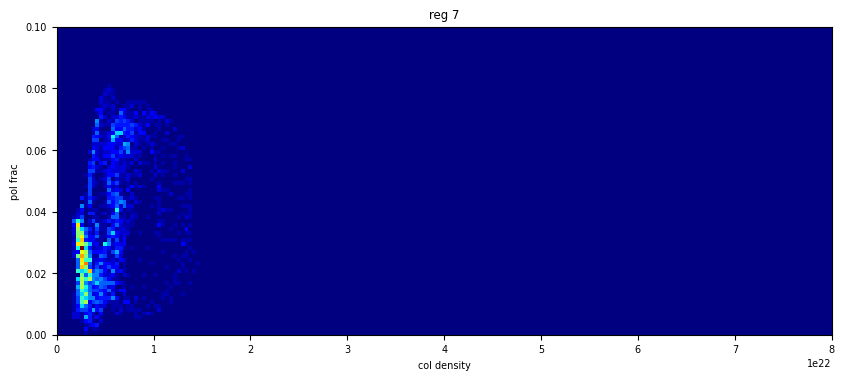

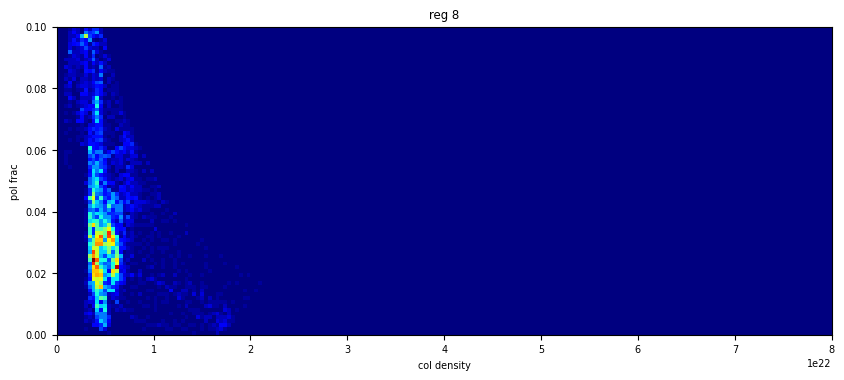

In [102]:

for x in range(len(pol_frac_list)):
    plt.figure(figsize = (10,4))
    plt.hist2d(tau353_list[x], pol_frac_list[x], range = [[0, 0.8*10**23], [0, 0.1]],  bins=(200, 80), cmap=plt.cm.jet)
    plt.title('reg ' + str(x))
    plt.xlabel('col density')
    plt.ylabel('pol frac')
#   plt.xlim(0, 0.001)
    plt.rcParams.update({'font.size': 7})
    plt.show()
    


9

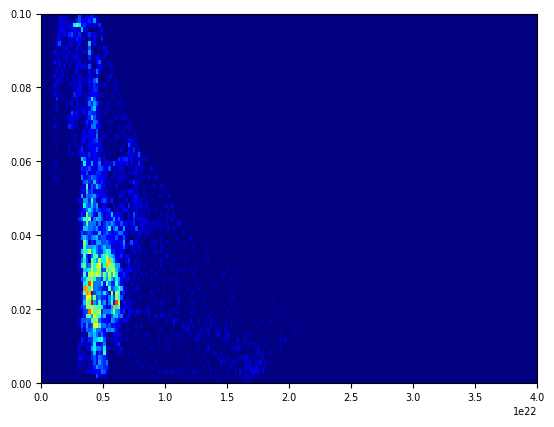

In [103]:
#hist = plt.hist2d(tau353_list[0], pol_frac_list[0], range = [[0, 0.001], [0, 0.1]],  bins=(200, 80), cmap=plt.cm.jet)
hist2d_list = []
xedges_list = []
yedges_list = []
for x in range (len(tau353_list)):
    hist, xedges, yedges, im = plt.hist2d(tau353_list[x], pol_frac_list[x], range = [[0, 0.4*10**23], [0, 0.1]],  bins=(200, 80), cmap=plt.cm.jet)
    hist2d_list.append(hist)
    xedges_list.append(xedges)
    yedges_list.append(yedges)
len(xedges_list)

<Figure size 3000x800 with 0 Axes>

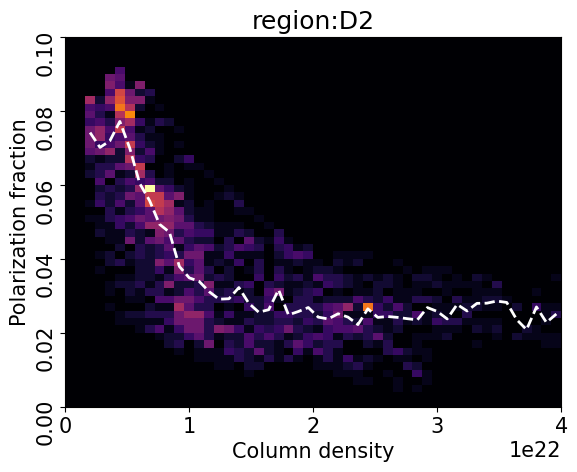

<Figure size 3000x800 with 0 Axes>

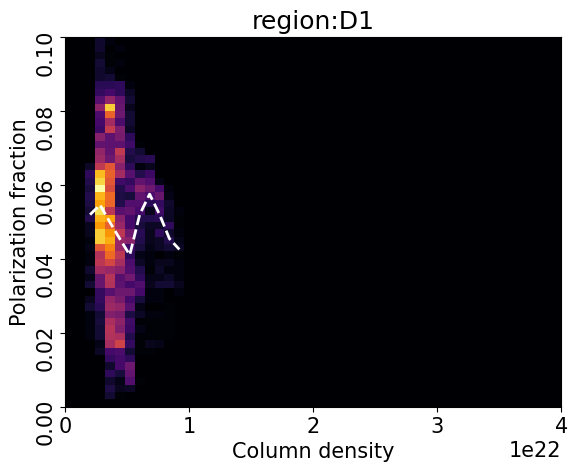

<Figure size 3000x800 with 0 Axes>

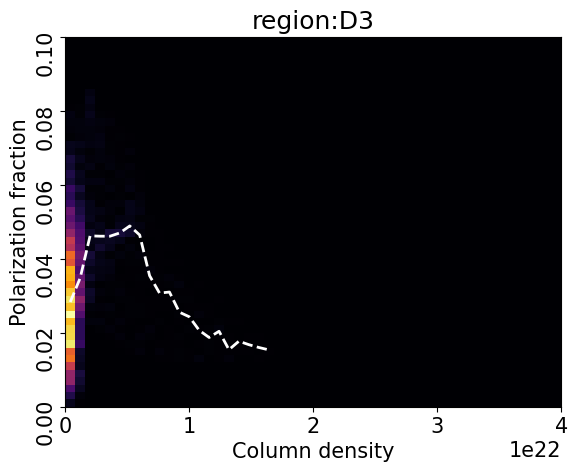

<Figure size 3000x800 with 0 Axes>

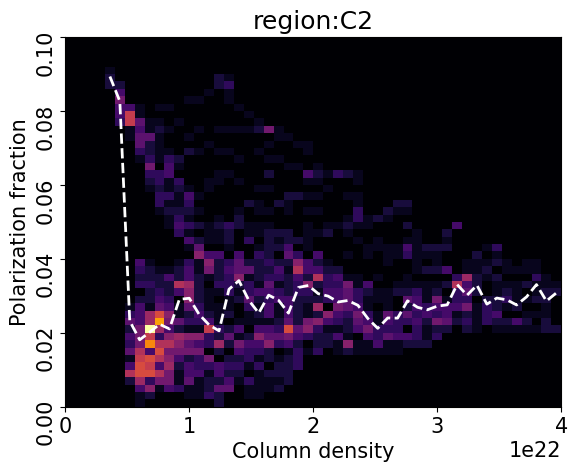

<Figure size 3000x800 with 0 Axes>

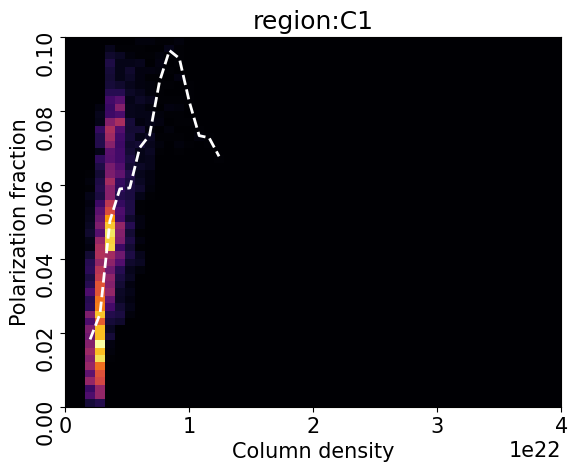

<Figure size 3000x800 with 0 Axes>

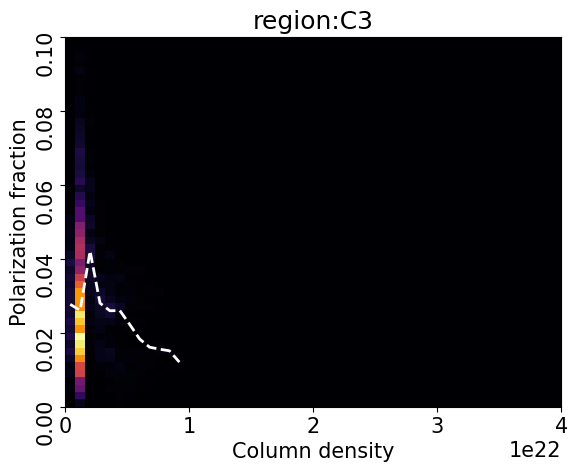

<Figure size 3000x800 with 0 Axes>

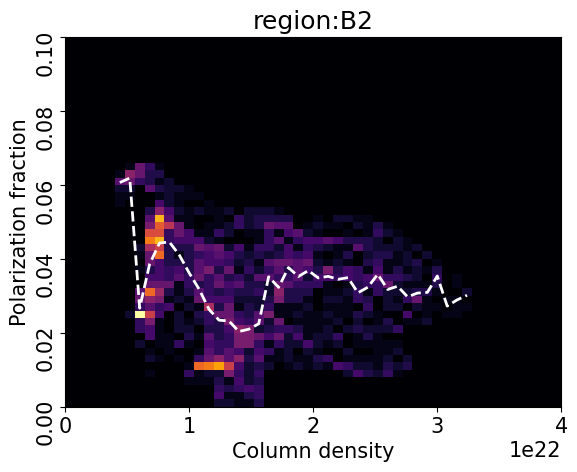

<Figure size 3000x800 with 0 Axes>

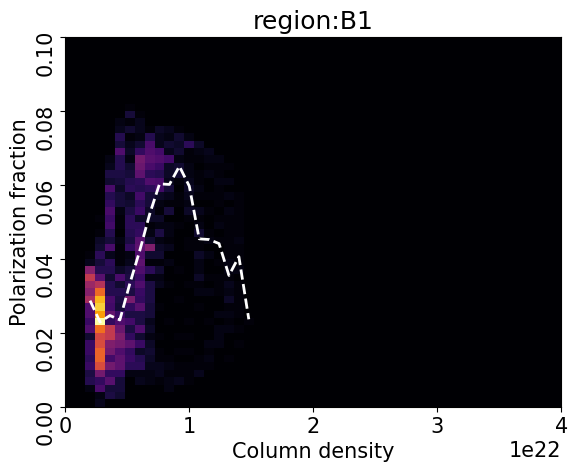

<Figure size 3000x800 with 0 Axes>

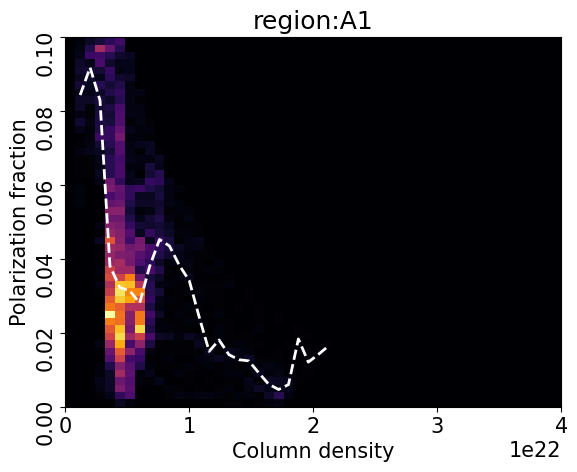

In [106]:
for a in range(len(tau353_list)):
    x = tau353_list[a]
    y = pol_frac_list[a]

    plt.figure(figsize = (30,8))
    plt.rcParams.update({'font.size': 15})

    #Define 2D histogram
    fig, ax = plt.subplots()
    hist, xedges, yedges, im = ax.hist2d(x, y, bins=50, range = [[0, 0.4*10**23], [0, 0.1]], cmap='inferno')

    #Col_density ranged
    x_range = (0, 0.2*10**23)
    x_indices = np.where((xedges >= x_range[0]) & (xedges <= x_range[1]))[0]

    #Compute median
    y_values = []
    for i in x_indices:
        y_bin = hist[i, :]
        y_values.extend(y_bin[y_bin > 0])
    median_y = np.median(y_values)

    #Plotting
    x_centers = (xedges[:-1] + xedges[1:]) / 2
    median_y_values = []
    for i in range(len(x_centers)):
        x_center = x_centers[i]
        x_bin = hist[i, :]
        y_bin_indices = np.where((x >= xedges[i]) & (x < xedges[i+1]))[0]
        if len(y_bin_indices) > 0:
            y_bin = y[y_bin_indices]
            median_y_bin = np.median(y_bin)
            median_y_values.append(median_y_bin)
        else:
            median_y_values.append(np.nan)
    ax.plot(x_centers, median_y_values, 'w--', lw=2)
    plt.ylabel('Polarization fraction')
    plt.xlabel('Column density')
    plt.yticks(rotation=90)#, ha='right')
    plt.title('region:' + label[a])
    #plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/orion/plots/image_2Dhist_med_polfrac_r3'+str(a)+'_'+label[a])

    plt.show()
